# NNIA Assignment 7

**DEADLINE: 12. 1. 2022 08:00 CET**
Submission more than 10 minutes past the deadline will **not** be graded!

- Trevor Atkins & trat00001@uni-saarland.de 
- Tsimafei Prakapenka & tspr00001@uni-saarland.de
- Hours of work per person: Prakapenka ~6h Atkins ~3h

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

# Neural Network Implementation: Training and Optimization

In Assignment 5, you have implemented the forward pass and backpropagation from scratch. Congratulations! Now you can train your network.

In this exercise, we will go back to working with [the PyTorch Datasets Class](https://pytorch.org/vision/stable/datasets.html) to obtain
[the CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Our goal is to benchmark our simple neural network by classifying the images in this dataset into their proper classes.

You have learned about regularization and optimization techniques during the previous lectures. In this exercise, you will get to have some more hands-on practice to improve this simple neural network.

## 1 SGD, Batch, Mini-Batch  (1.5 pts)

Recall from Assignment 5 that when we train our model, we are trying to solve the following minimization function via stochatic gradient descent:

$$ \begin{align}
\tag{15}
\min_{\theta} \tilde J (\theta) 
\end{align}$$

Typically neural networks are large and are trained with millions of data points. It is thus often infeasible to compute the gradient $\nabla_{\theta} \tilde J(\theta)$ that requires the accumulation of the gradient over the entire training set. 

There are various online resources on Stochastic, Batch, and Minit-Gradient Descent methods in addition to what was covered during the lecture. Here are a few:

- [Medium: Batch , Mini-Batch and Stochastic gradient descent](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461)
- [DeepLearningAI: Batch vs Mini-Batch](https://youtu.be/4qJaSmvhxi8)

**Discuss pros and cons of (1) stochastic (m=1), (2) batch (m = size of dataset) and (3) mini-batch gradient descent** (m is the number of points passed at a time).

## <font color="green">Answer</font>


### 1

- Stochastic: 
  - Pros: 
    - Faster than batch and mini-batch.
    - The lowest possible memory consumption.
  - Cons:
    - Less accurate than batch and mini-batch.
    - Large imporance of learning rate controlling/tuning.

- Batch: 
  - Pros: 
    - More accurate than stochastic and mini-batch.
    - Utilizes all available knowledge to train the model.
  - Cons:
    - Less fast than batch and mini-batch
    - High memory consumption, since we are calculating loss based on the whole data.

- Mini-Batch: 
  - Pros: 
    - More accurate than stochastic and faster than batch.
    - Basically, the best possible alternative across 3 available options.
  - Cons:
    - Less fast than stochastic and less accurate than batch.

## 2: Training Implementation (4 pts)

In this question we will implement the `training` and `predicting` functions to the *NeuralNetworkModel* Class in `solution.py` we worked on previously in the last assignment. The inialization and the loss computation is provided as a solution from the previous assignment. You may use your own implementation from the previous assignment or the one provided as long as you get similar results.

In this exercise, you will be following the Mini-Batch Gradient Descent approach in training the model. The skeleton code in `solution.py` includes momentum in the training.(You can read more about what that is in [Chapter 8: Optimization for Training Deep Models](https://www.deeplearningbook.org/contents/optimization.html) in [Goodfellow et al. (2016)](https://www.deeplearningbook.org/))

**Implement the code in `solution.py`** 

## 2 <font color="Green"> Answer </font>



### 2.1 Write the pseudocode steps for updating the gradients in a mini-batch gradient descent algorithm (1 pt)
Make sure to include learning rate, batch-size, iteration limit.

Your pseudocode:
```

func train_model(model, train_data, batch_size, loss_function,
                learning_rate, iteration_limit):
    cur_iter = 0

    while cur_iter < iteration_limit:
        # get random subset of data with selected size
        x_train, y_train = train_data.get_random_subset(size=batch_size)

        # forward path of the model
        model_output = model(x_train)

        # get loss value and gradients of the model's parameters
        # loss is float
        # grads is a key-value dictionary of parameters with param_name as key and param_value (matrix or vector) as value
        loss, grads = loss_function(x_train, y_train)

        # model_params is a key-value dictionary of parameters
        model_params = model.get_params()

        # update model parameters
        for param_name, param_value in model_params:
            model.params[param_name] = model.params[param_name] - learning_rate*grads[param_name]
          
        # increment iterations count
        cur_iter = cur_iter + 1
    
    return model
```



### 2.2 Implementation (2 pt)
Implement the `train` and `predict` functions in `solution.py`. Use the following default hyperparameters to train your model:

* num_epocs = 4
* learning_rate = 1e-5
* reg = 0.1
* learning_rate_decay = 0.95

(Hint: with the deafult parameters above, you should get the validation accuracy of around 23%.)

**Fill in the missing code below to load the dataset**

You may need to import necessary modules.

In [2]:
%%capture
! pip install wget

In [3]:
import os
import wget

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [8]:
if not os.path.isfile('solution.py'):
    wget.download(
        'https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/Neural_Networks/HW7_solution.py',
        'solution.py',
    )

In [5]:
%load_ext autoreload
%autoreload 2

In [13]:
BATCH_SIZE = 32

In [14]:
from solution import get_cifar10_dataset

train_loader, test_loader, val_loader, classes = get_cifar10_dataset(batch_size=BATCH_SIZE)

val_dataset_tensor = next(iter(val_loader))
X_val, y_val = val_dataset_tensor[0], val_dataset_tensor[1]

test_dataset_tensor = next(iter(test_loader))
X_test, y_test = test_dataset_tensor[0], test_dataset_tensor[1]

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(X_val.shape, X_test.shape)

torch.Size([1000, 3072]) torch.Size([10000, 3072])


In [ ]:
hyperparams = {
    'num_epochs': 4,
    'learning_rate': 1e-5,
    'reg': 0.1,
    'learning_rate_decay': 0.95,
    'batch_size': BATCH_SIZE,
    'input_size': X_val.shape[1],
    'hidden_size': 128,
    'output_size': len(classes),
}

In [ ]:
from solution import NeuralNetworkModel

# Train the network with default hyperparameters
model = NeuralNetworkModel(input_size=hyperparams['input_size'],
                           hidden_size=hyperparams['hidden_size'],
                           output_size=hyperparams['output_size'])

train_metrics = model.train(train_dataloader=train_loader,
                            X_val=X_val,
                            y_val=y_val, 
                            learning_rate=hyperparams['learning_rate'],
                            learning_rate_decay=hyperparams['learning_rate_decay'], 
                            num_epochs=hyperparams['num_epochs'])

batch 1 / 245: loss 2.302773
batch 101 / 245: loss 2.299096
batch 201 / 245: loss 2.286264
NEW BEST VALIDATION LOSS 2.2846696424471964, SAVING MODEL PARAMETERS...
Epoch 1 / 4:
Training Accuracy: 0.09333333333333334
Validation Accuracy: 0.121
Loss: 2.282495186316283
batch 1 / 245: loss 2.279315
batch 101 / 245: loss 2.266768
batch 201 / 245: loss 2.234302
NEW BEST VALIDATION LOSS 2.1714639780465794, SAVING MODEL PARAMETERS...
Epoch 2 / 4:
Training Accuracy: 0.1416666666666667
Validation Accuracy: 0.187
Loss: 2.2151448811995698
batch 1 / 245: loss 2.159863
batch 101 / 245: loss 2.153907
batch 201 / 245: loss 2.148182
NEW BEST VALIDATION LOSS 2.066607478104248, SAVING MODEL PARAMETERS...
Epoch 3 / 4:
Training Accuracy: 0.19166666666666668
Validation Accuracy: 0.229
Loss: 2.1400581255250035
batch 1 / 245: loss 2.090248
batch 101 / 245: loss 2.079168
batch 201 / 245: loss 2.014796
NEW BEST VALIDATION LOSS 2.002416624496464, SAVING MODEL PARAMETERS...
Epoch 4 / 4:
Training Accuracy: 0.246666

### 2.3 Ploting (1 pt)
One strategy for getting insight into what's going on during training is to plot the loss and the accuracies on the training and validation sets. Submit 2 plots:

(1) Loss vs loss update steps 

(2) training and validation accuracies vs Iterations (Epochs)

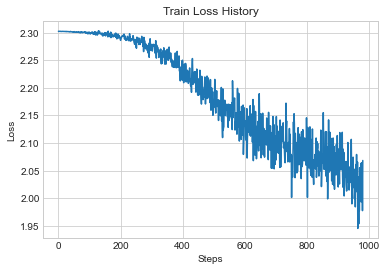

In [ ]:
from solution import draw_simple_plot

draw_simple_plot(train_metrics['train_loss_history'], 
                 x_label='Steps', 
                 y_label='Loss',
                 plot_title='Train Loss History')

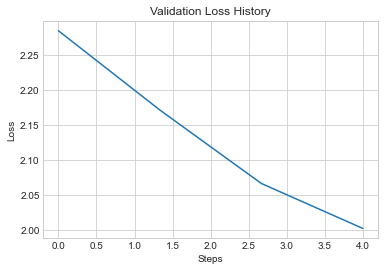

In [ ]:
draw_simple_plot(train_metrics['val_loss_history'], 
                 x_label='Steps', 
                 y_label='Loss', 
                 plot_title='Validation Loss History')

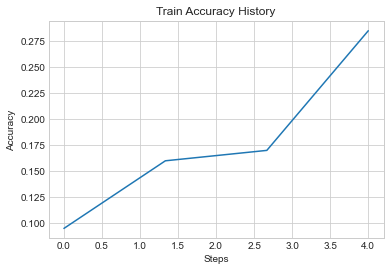

In [ ]:
draw_simple_plot(train_metrics['train_acc_history'], 
                 x_label='Steps', 
                 y_label='Accuracy', 
                 plot_title='Train Accuracy History')

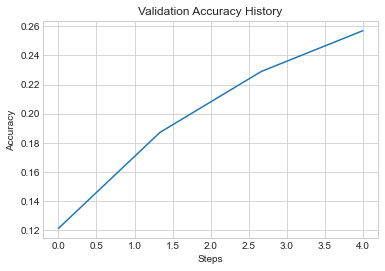

In [ ]:
draw_simple_plot(train_metrics['val_acc_history'], 
                 x_label='Steps', 
                 y_label='Accuracy', 
                 plot_title='Validation Accuracy History')

## 3 Fine-Tuning (2 pts + 1 Bonus pts)

With default hyperparameters, if previous questions have been done correctly, you should get validation set accuracy of at least around 23%. Can we do better?. 

### Fine-Tuning (1 + 1 = 2 pts)

Your task is to fine-tune the model training and come up with a better set of hyper-parameters to improve the performance on the validation set from the default results. **(1 pt)** Visualize the training and validation performance curves to help with this analysis.

(Note: if you decided to change the batch size from 200, with the way the skeleton code is implemented, you will have to adjust this in the `get_cifar10_dataset` function and reload your Dataloaders.)

**Justify** The hyperparameters you are modifying and **discuss** the effects of adjusting these hyperparameters on your validation results. **(1 pt)**

**Bonus 1 pt:** Experiment with different combinations of hyperparameters and report the evaluation results on the test set from your best model.



## 3 <font color="green"> Answer </font>

Here is my plan for hyperparameters search:
1) Increase epoch num, since it looks like that we are underfitting having only 4 epochs.
2) Try 32-64-128-256-512 batch size, since there is no guarantee that 200 is an optimal one. Additionally, it is better to choose pows of 2 as batch size for computational efficiency reasons.
3) Various batch sizes require careful learning rate tuning, then I am going to try different options: 1e-5, 1e-4, 1e-3.

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 10, learning rate = 1e-05, batch_size=32...
batch 1 / 1532: loss 2.302497
batch 101 / 1532: loss 2.302115
batch 201 / 1532: loss 2.289053
batch 301 / 1532: loss 2.311005
batch 401 / 1532: loss 2.210911
batch 501 / 1532: loss 2.265818
batch 601 / 1532: loss 2.025860
batch 701 / 1532: loss 2.039306
batch 801 / 1532: loss 2.020424
batch 901 / 1532: loss 1.958552
batch 1001 / 1532: loss 2.035135
batch 1101 / 1532: loss 2.112407
batch 1201 / 1532: loss 1.984313
batch 1301 / 1532: loss 2.136292
batch 1401 / 1532: loss 2.054021
batch 1501 / 1532: loss 2.083500
NEW BEST VALIDATION LOSS 1.9237840510541253, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.20703125
Validation Accuracy: 0.281
Loss: 1.5023809341013579
batch 1 / 1532: loss 1.907379
batch 101 / 1532: loss 1.891710
batch 201 / 1532: loss 1.993230
batch 301 / 1532: loss 1.744872
batch 401 / 1532: loss 1.844506
batch 501 /

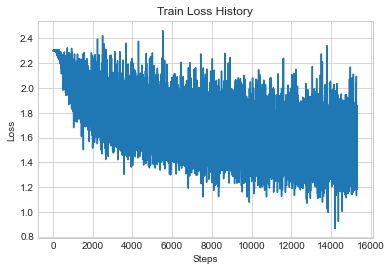

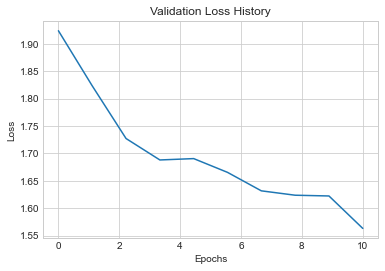

Saving best hyperparams based on validation loss 1.5631095232144174...
{'learning_rate': 1e-05, 'batch_size': 32, 'num_epochs': 10}
Testing number of epochs = 10, learning rate = 0.0001, batch_size=32...
batch 1 / 1532: loss 2.302457
batch 101 / 1532: loss 2.154867
batch 201 / 1532: loss 2.316286
batch 301 / 1532: loss 2.081220
batch 401 / 1532: loss 2.011976
batch 501 / 1532: loss 1.762243
batch 601 / 1532: loss 1.819082
batch 701 / 1532: loss 1.788163
batch 801 / 1532: loss 1.949814
batch 901 / 1532: loss 2.051441
batch 1001 / 1532: loss 1.850109
batch 1101 / 1532: loss 1.746192
batch 1201 / 1532: loss 1.854358
batch 1301 / 1532: loss 1.855920
batch 1401 / 1532: loss 1.990010
batch 1501 / 1532: loss 1.722645
NEW BEST VALIDATION LOSS 1.889260613603868, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.392578125
Validation Accuracy: 0.31
Loss: 2.2445769255248713
batch 1 / 1532: loss 1.688112
batch 101 / 1532: loss 2.052382
batch 201 / 1532: loss 1.479638
batch 301 / 1532: l

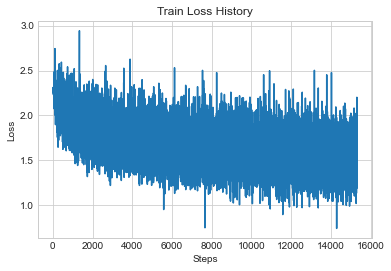

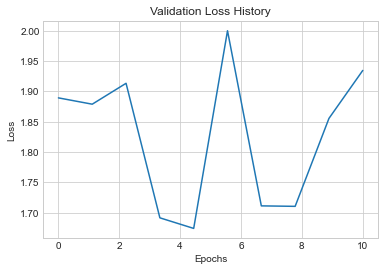

Testing number of epochs = 10, learning rate = 0.001, batch_size=32...
batch 1 / 1532: loss 2.303119
batch 101 / 1532: loss 2.302689
batch 201 / 1532: loss 2.302666
batch 301 / 1532: loss 2.302709
batch 401 / 1532: loss 2.302635
batch 501 / 1532: loss 2.302693
batch 601 / 1532: loss 2.302537
batch 701 / 1532: loss 2.302520
batch 801 / 1532: loss 2.302474
batch 901 / 1532: loss 2.302557
batch 1001 / 1532: loss 2.302383
batch 1101 / 1532: loss 2.302836
batch 1201 / 1532: loss 2.302757
batch 1301 / 1532: loss 2.302498
batch 1401 / 1532: loss 2.302681
batch 1501 / 1532: loss 2.302671
NEW BEST VALIDATION LOSS 2.302600087073539, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.11328125
Validation Accuracy: 0.093
Loss: 2.3025925411737225
batch 1 / 1532: loss 2.302570
batch 101 / 1532: loss 2.302674
batch 201 / 1532: loss 2.302485
batch 301 / 1532: loss 2.302716
batch 401 / 1532: loss 2.302454
batch 501 / 1532: loss 2.302912
batch 601 / 1532: loss 2.302220
batch 701 / 1532: loss 2

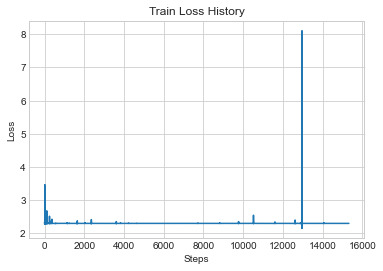

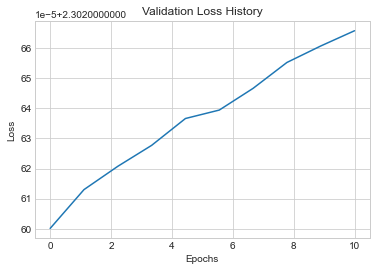

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 10, learning rate = 1e-05, batch_size=64...
batch 1 / 766: loss 2.302082
batch 101 / 766: loss 2.300082
batch 201 / 766: loss 2.295798
batch 301 / 766: loss 2.287534
batch 401 / 766: loss 2.235647
batch 501 / 766: loss 2.243516
batch 601 / 766: loss 2.121009
batch 701 / 766: loss 2.044016
NEW BEST VALIDATION LOSS 2.1040753901201725, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.140625
Validation Accuracy: 0.242
Loss: 2.1389792346511185
batch 1 / 766: loss 2.025542
batch 101 / 766: loss 1.959786
batch 201 / 766: loss 2.156743
batch 301 / 766: loss 2.090135
batch 401 / 766: loss 2.102311
batch 501 / 766: loss 1.904694
batch 601 / 766: loss 2.054470
batch 701 / 766: loss 1.898541
NEW BEST VALIDATION LOSS 1.9635456531081517, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.2734375
Validation Accuracy: 0.305
Loss: 2.0909161290755542
batch 1 / 766: loss 2.132083

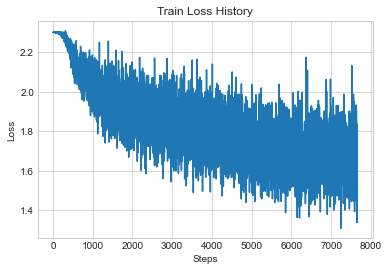

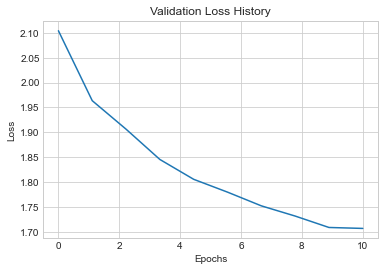

Testing number of epochs = 10, learning rate = 0.0001, batch_size=64...
batch 1 / 766: loss 2.302581
batch 101 / 766: loss 2.282985
batch 201 / 766: loss 2.042863
batch 301 / 766: loss 1.932664
batch 401 / 766: loss 1.844382
batch 501 / 766: loss 1.744759
batch 601 / 766: loss 1.913876
batch 701 / 766: loss 1.785567
NEW BEST VALIDATION LOSS 2.140301929062677, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.32421875
Validation Accuracy: 0.263
Loss: 1.767497155667364
batch 1 / 766: loss 1.924861
batch 101 / 766: loss 1.777357
batch 201 / 766: loss 1.691186
batch 301 / 766: loss 1.959634
batch 401 / 766: loss 1.727881
batch 501 / 766: loss 1.944666
batch 601 / 766: loss 1.598248
batch 701 / 766: loss 1.938185
NEW BEST VALIDATION LOSS 1.8359799638065963, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.427734375
Validation Accuracy: 0.329
Loss: 1.6684166773140858
batch 1 / 766: loss 1.827714
batch 101 / 766: loss 1.632509
batch 201 / 766: loss 1.711232
batch 301 

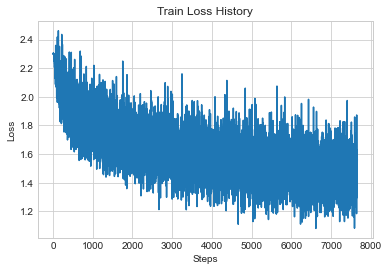

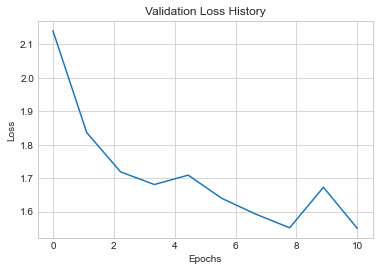

Saving best hyperparams based on validation loss 1.5497773674634432...
{'learning_rate': 0.0001, 'batch_size': 64, 'num_epochs': 10}
Testing number of epochs = 10, learning rate = 0.001, batch_size=64...
batch 1 / 766: loss 2.302314
batch 101 / 766: loss 2.302560
batch 201 / 766: loss 2.302573
batch 301 / 766: loss 2.302660
batch 401 / 766: loss 2.302539
batch 501 / 766: loss 2.302498
batch 601 / 766: loss 2.302722
batch 701 / 766: loss 2.302636
NEW BEST VALIDATION LOSS 2.3026133357580427, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.115234375
Validation Accuracy: 0.084
Loss: 2.302545869458151
batch 1 / 766: loss 2.302545
batch 101 / 766: loss 2.302596
batch 201 / 766: loss 2.302613
batch 301 / 766: loss 2.302663
batch 401 / 766: loss 2.302578
batch 501 / 766: loss 2.302546
batch 601 / 766: loss 2.302628
batch 701 / 766: loss 2.302895
NEW BEST VALIDATION LOSS 2.3026045453887347, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.091796875
Validation Accuracy

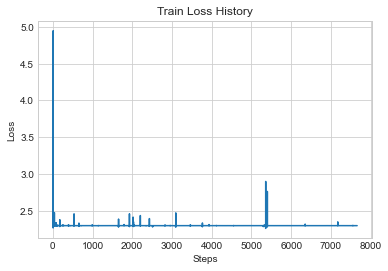

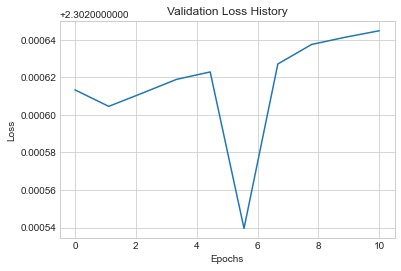

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 10, learning rate = 1e-05, batch_size=128...
batch 1 / 383: loss 2.302975
batch 101 / 383: loss 2.300394
batch 201 / 383: loss 2.295985
batch 301 / 383: loss 2.287613
NEW BEST VALIDATION LOSS 2.238398989411861, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.095703125
Validation Accuracy: 0.159
Loss: 2.225621372258788
batch 1 / 383: loss 2.269629
batch 101 / 383: loss 2.181968
batch 201 / 383: loss 2.172225
batch 301 / 383: loss 2.044480
NEW BEST VALIDATION LOSS 2.0682229308910496, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.197265625
Validation Accuracy: 0.205
Loss: 2.0546701425935314
batch 1 / 383: loss 2.065015
batch 101 / 383: loss 2.084168
batch 201 / 383: loss 2.064186
batch 301 / 383: loss 2.041268
NEW BEST VALIDATION LOSS 1.9837655016521585, SAVING MODEL PARAMETERS...
Epoch 3 / 10:
Training Accuracy: 0.19140625
Validation Accuracy: 0.272
Loss: 1

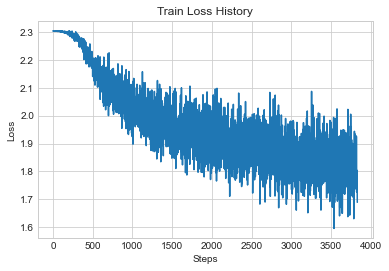

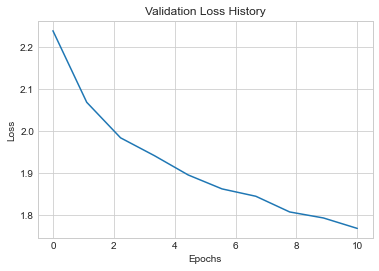

Testing number of epochs = 10, learning rate = 0.0001, batch_size=128...
batch 1 / 383: loss 2.302586
batch 101 / 383: loss 2.093299
batch 201 / 383: loss 1.917154
batch 301 / 383: loss 1.971698
NEW BEST VALIDATION LOSS 1.8175753575748836, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.2578125
Validation Accuracy: 0.339
Loss: 1.963472229381162
batch 1 / 383: loss 1.798896
batch 101 / 383: loss 1.700156
batch 201 / 383: loss 1.923897
batch 301 / 383: loss 1.759414
NEW BEST VALIDATION LOSS 1.7428519829450906, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.37890625
Validation Accuracy: 0.367
Loss: 1.76273663420628
batch 1 / 383: loss 1.713810
batch 101 / 383: loss 1.628979
batch 201 / 383: loss 1.722581
batch 301 / 383: loss 1.582439
NEW BEST VALIDATION LOSS 1.739167703455802, SAVING MODEL PARAMETERS...
Epoch 3 / 10:
Training Accuracy: 0.47265625
Validation Accuracy: 0.376
Loss: 1.6900958309713614
batch 1 / 383: loss 1.783896
batch 101 / 383: loss 1.832351
ba

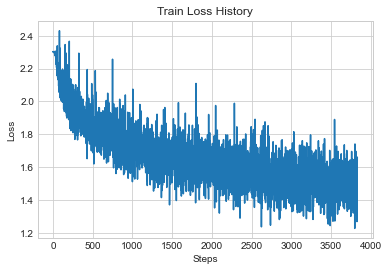

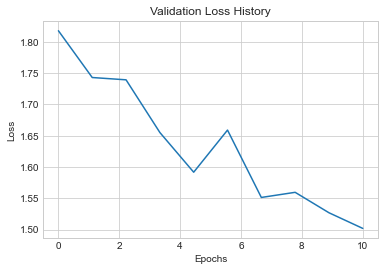

Saving best hyperparams based on validation loss 1.5017867012215877...
{'learning_rate': 0.0001, 'batch_size': 128, 'num_epochs': 10}
Testing number of epochs = 10, learning rate = 0.001, batch_size=128...
batch 1 / 383: loss 2.302332
batch 101 / 383: loss 2.302610
batch 201 / 383: loss 2.302618
batch 301 / 383: loss 2.302604
NEW BEST VALIDATION LOSS 2.302592642611843, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.126953125
Validation Accuracy: 0.104
Loss: 2.302660357609397
batch 1 / 383: loss 2.302566
batch 101 / 383: loss 2.302554
batch 201 / 383: loss 2.302542
batch 301 / 383: loss 2.302456
NEW BEST VALIDATION LOSS 2.2956264844846004, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.12890625
Validation Accuracy: 0.112
Loss: 2.3003830089445647
batch 1 / 383: loss 2.249163
batch 101 / 383: loss 2.302675
batch 201 / 383: loss 2.302667
batch 301 / 383: loss 2.302622
Epoch 3 / 10:
Training Accuracy: 0.10546875
Validation Accuracy: 0.103
Loss: 2.30262733338061

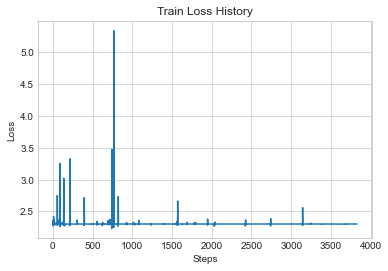

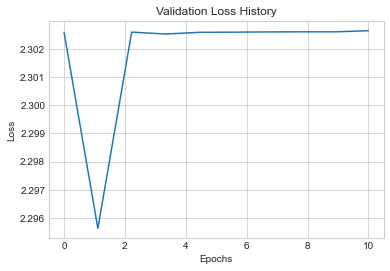

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 10, learning rate = 1e-05, batch_size=256...
batch 1 / 192: loss 2.302758
batch 101 / 192: loss 2.300953
NEW BEST VALIDATION LOSS 2.293863046233021, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.09375
Validation Accuracy: 0.102
Loss: 2.2912302012265884
batch 1 / 192: loss 2.295277
batch 101 / 192: loss 2.279714
NEW BEST VALIDATION LOSS 2.2492495463547986, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.0859375
Validation Accuracy: 0.153
Loss: 2.248606738685548
batch 1 / 192: loss 2.259712
batch 101 / 192: loss 2.173926
NEW BEST VALIDATION LOSS 2.1480368644836734, SAVING MODEL PARAMETERS...
Epoch 3 / 10:
Training Accuracy: 0.177734375
Validation Accuracy: 0.215
Loss: 2.12463436206988
batch 1 / 192: loss 2.143741
batch 101 / 192: loss 2.132198
NEW BEST VALIDATION LOSS 2.07980952600232, SAVING MODEL PARAMETERS...
Epoch 4 / 10:
Training Accuracy: 0.201171875


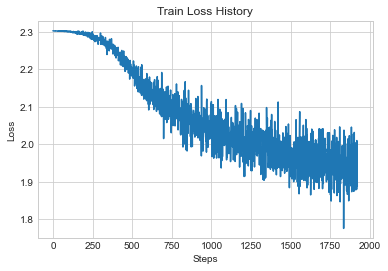

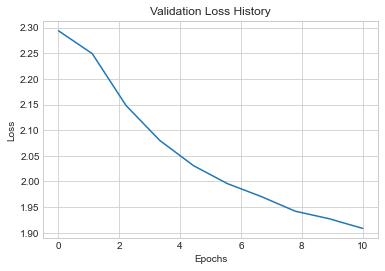

Testing number of epochs = 10, learning rate = 0.0001, batch_size=256...
batch 1 / 192: loss 2.302834
batch 101 / 192: loss 2.035936
NEW BEST VALIDATION LOSS 1.9974295812367628, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.17578125
Validation Accuracy: 0.27
Loss: 1.9385149586168868
batch 1 / 192: loss 2.012103
batch 101 / 192: loss 1.884395
NEW BEST VALIDATION LOSS 1.9050081874501346, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.306640625
Validation Accuracy: 0.285
Loss: 1.7098960092373434
batch 1 / 192: loss 1.992041
batch 101 / 192: loss 1.779337
NEW BEST VALIDATION LOSS 1.7483706749731718, SAVING MODEL PARAMETERS...
Epoch 3 / 10:
Training Accuracy: 0.341796875
Validation Accuracy: 0.366
Loss: 1.940523016550813
batch 1 / 192: loss 1.788923
batch 101 / 192: loss 1.866513
Epoch 4 / 10:
Training Accuracy: 0.34765625
Validation Accuracy: 0.352
Loss: 1.7524923911879224
batch 1 / 192: loss 1.883587
batch 101 / 192: loss 1.769897
NEW BEST VALIDATION LOSS 1.

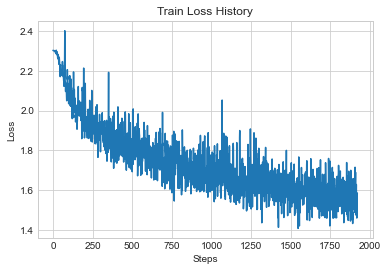

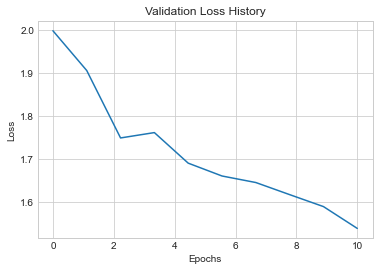

Testing number of epochs = 10, learning rate = 0.001, batch_size=256...
batch 1 / 192: loss 2.302821
batch 101 / 192: loss 2.300709
NEW BEST VALIDATION LOSS 2.3026099270535405, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.15234375
Validation Accuracy: 0.101
Loss: 2.3026494148880334
batch 1 / 192: loss 2.302582
batch 101 / 192: loss 2.302119
NEW BEST VALIDATION LOSS 2.302541160772095, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.103515625
Validation Accuracy: 0.102
Loss: 2.301093945044603
batch 1 / 192: loss 2.302504
batch 101 / 192: loss 2.555839
Epoch 3 / 10:
Training Accuracy: 0.125
Validation Accuracy: 0.097
Loss: 2.302643364202206
batch 1 / 192: loss 2.302640
batch 101 / 192: loss 2.302479
Epoch 4 / 10:
Training Accuracy: 0.0859375
Validation Accuracy: 0.097
Loss: 2.3026624483934053
batch 1 / 192: loss 2.302670
batch 101 / 192: loss 2.302714
Epoch 5 / 10:
Training Accuracy: 0.080078125
Validation Accuracy: 0.097
Loss: 2.3026008512063596
batch 1 / 1

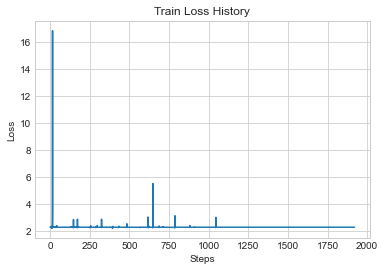

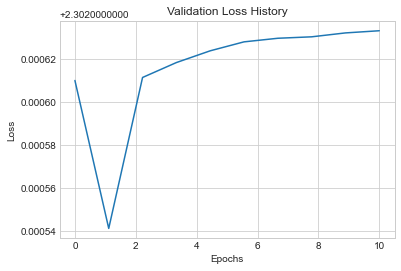

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 10, learning rate = 1e-05, batch_size=512...
batch 1 / 96: loss 2.302338
NEW BEST VALIDATION LOSS 2.3000990695624086, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.0859375
Validation Accuracy: 0.12
Loss: 2.2992636805006357
batch 1 / 96: loss 2.299684
NEW BEST VALIDATION LOSS 2.2936116977818584, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.1171875
Validation Accuracy: 0.104
Loss: 2.293205048091747
batch 1 / 96: loss 2.292510
NEW BEST VALIDATION LOSS 2.277702860955481, SAVING MODEL PARAMETERS...
Epoch 3 / 10:
Training Accuracy: 0.10546875
Validation Accuracy: 0.15
Loss: 2.277618976266388
batch 1 / 96: loss 2.273856
NEW BEST VALIDATION LOSS 2.2461807470290096, SAVING MODEL PARAMETERS...
Epoch 4 / 10:
Training Accuracy: 0.123046875
Validation Accuracy: 0.173
Loss: 2.2412691095912587
batch 1 / 96: loss 2.250266
NEW BEST VALIDATION LOSS 2.2000904429134973, S

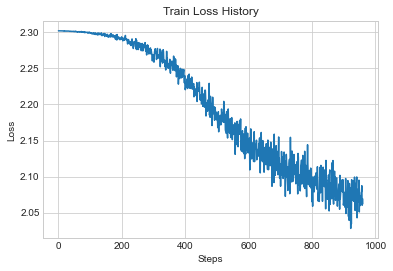

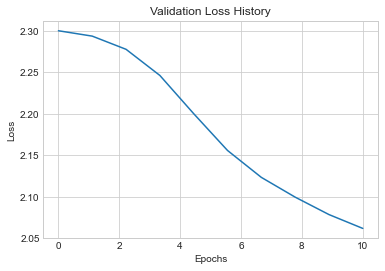

Testing number of epochs = 10, learning rate = 0.0001, batch_size=512...
batch 1 / 96: loss 2.302571
NEW BEST VALIDATION LOSS 2.07968523755096, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.1640625
Validation Accuracy: 0.2
Loss: 2.07623559191002
batch 1 / 96: loss 2.058028
NEW BEST VALIDATION LOSS 1.9281479298986637, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.2734375
Validation Accuracy: 0.298
Loss: 1.91335331733686
batch 1 / 96: loss 1.895429
NEW BEST VALIDATION LOSS 1.9237380076990616, SAVING MODEL PARAMETERS...
Epoch 3 / 10:
Training Accuracy: 0.30859375
Validation Accuracy: 0.296
Loss: 1.8755007703879434
batch 1 / 96: loss 1.915381
Epoch 4 / 10:
Training Accuracy: 0.3359375
Validation Accuracy: 0.298
Loss: 1.8667491899557747
batch 1 / 96: loss 1.939353
NEW BEST VALIDATION LOSS 1.7732064084262933, SAVING MODEL PARAMETERS...
Epoch 5 / 10:
Training Accuracy: 0.33203125
Validation Accuracy: 0.37
Loss: 1.7730415545888751
batch 1 / 96: loss 1.768174
Epo

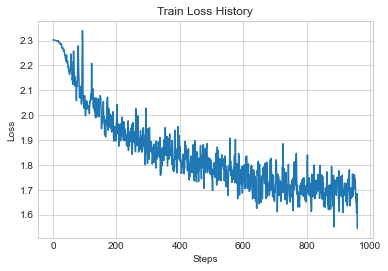

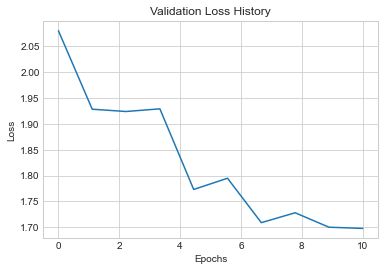

Testing number of epochs = 10, learning rate = 0.001, batch_size=512...
batch 1 / 96: loss 2.302457
NEW BEST VALIDATION LOSS 2.3025834590998326, SAVING MODEL PARAMETERS...
Epoch 1 / 10:
Training Accuracy: 0.14453125
Validation Accuracy: 0.119
Loss: 2.302573268656199
batch 1 / 96: loss 2.302462
NEW BEST VALIDATION LOSS 2.27866546018532, SAVING MODEL PARAMETERS...
Epoch 2 / 10:
Training Accuracy: 0.087890625
Validation Accuracy: 0.137
Loss: 2.2859577872423107
batch 1 / 96: loss 2.293843
Epoch 3 / 10:
Training Accuracy: 0.146484375
Validation Accuracy: 0.118
Loss: 2.302559282638888
batch 1 / 96: loss 2.302614
Epoch 4 / 10:
Training Accuracy: 0.125
Validation Accuracy: 0.119
Loss: 2.3025873435481947
batch 1 / 96: loss 2.302570
Epoch 5 / 10:
Training Accuracy: 0.0859375
Validation Accuracy: 0.118
Loss: 2.3021695664625486
batch 1 / 96: loss 2.302581
Epoch 6 / 10:
Training Accuracy: 0.095703125
Validation Accuracy: 0.118
Loss: 2.3025558984788086
batch 1 / 96: loss 2.302627
Epoch 7 / 10:
Train

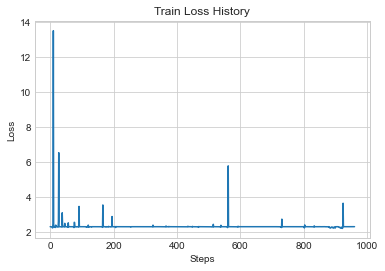

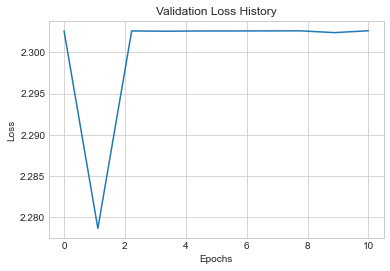

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 20, learning rate = 1e-05, batch_size=32...
batch 1 / 1532: loss 2.302681
batch 101 / 1532: loss 2.295072
batch 201 / 1532: loss 2.300390
batch 301 / 1532: loss 2.236511
batch 401 / 1532: loss 2.180639
batch 501 / 1532: loss 2.123225
batch 601 / 1532: loss 2.058206
batch 701 / 1532: loss 2.093122
batch 801 / 1532: loss 2.002550
batch 901 / 1532: loss 2.015900
batch 1001 / 1532: loss 1.955708
batch 1101 / 1532: loss 2.045719
batch 1201 / 1532: loss 1.960065
batch 1301 / 1532: loss 2.002646
batch 1401 / 1532: loss 2.097999
batch 1501 / 1532: loss 1.979831
NEW BEST VALIDATION LOSS 2.0529265149966367, SAVING MODEL PARAMETERS...
Epoch 1 / 20:
Training Accuracy: 0.220703125
Validation Accuracy: 0.254
Loss: 2.5099098326709885
batch 1 / 1532: loss 2.072749
batch 101 / 1532: loss 1.993701
batch 201 / 1532: loss 1.763249
batch 301 / 1532: loss 2.078129
batch 401 / 1532: loss 2.017752
batch 501 

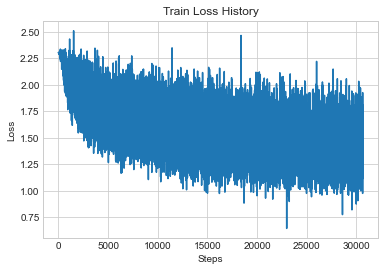

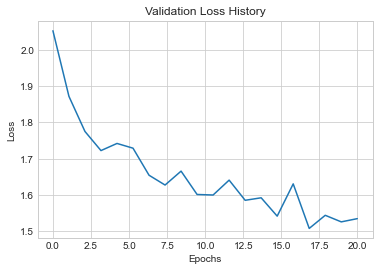

Testing number of epochs = 20, learning rate = 0.0001, batch_size=32...
batch 1 / 1532: loss 2.302666
batch 101 / 1532: loss 2.243676
batch 201 / 1532: loss 1.939899
batch 301 / 1532: loss 2.009700
batch 401 / 1532: loss 2.014238
batch 501 / 1532: loss 2.476143
batch 601 / 1532: loss 1.661355
batch 701 / 1532: loss 1.709732
batch 801 / 1532: loss 1.729017
batch 901 / 1532: loss 1.918715
batch 1001 / 1532: loss 1.892340
batch 1101 / 1532: loss 1.955604
batch 1201 / 1532: loss 2.178535
batch 1301 / 1532: loss 1.949265
batch 1401 / 1532: loss 2.069126
batch 1501 / 1532: loss 1.733548
NEW BEST VALIDATION LOSS 2.0289799427070854, SAVING MODEL PARAMETERS...
Epoch 1 / 20:
Training Accuracy: 0.369140625
Validation Accuracy: 0.302
Loss: 1.2894275032005629
batch 1 / 1532: loss 1.938163
batch 101 / 1532: loss 1.702563
batch 201 / 1532: loss 1.856954
batch 301 / 1532: loss 1.674218
batch 401 / 1532: loss 1.761656
batch 501 / 1532: loss 1.841652
batch 601 / 1532: loss 1.629774
batch 701 / 1532: los

KeyboardInterrupt: 

In [ ]:
from solution import find_best_model

best_model, best_hyperparams = find_best_model(base_hyperparams=hyperparams,
                                               epoch_nums = [10, 20, 30, 50, 100],
                                               batch_sizes = [32, 64, 128, 256, 512],
                                               learning_rates = [1e-5, 1e-4, 1e-3])

Increased number of epoch gives better loss and accuracy, since we are eliminating underfitting.

Also, learning rate 0.001 works bad for every set of hyperparams, so we can conclude that it is too big for this task to converge. It is better to consider 1e-5, since for this learning rate every 'batch_size' value results in continuosly decreasing val_loss curve. This could be explained by less stohastic behaviour patterns usually observed for lower learning rates.

Finally, it looks like the small batch_sizes (32, 64, 128) give better accuracy and loss. In my opinion, it could be explained by fact that we are updating weights more frequently. However, we should estimate time-accuracy bias.

I have decided to restart grid search with less hyperparams combinations.

Before we proceed, let's remember best params at the moment:
Saving best hyperparams based on validation loss 1.5017867012215877...
{'learning_rate': 0.0001, 'batch_size': 128, 'num_epochs': 10}

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 15, learning rate = 1e-05, batch_size=32...
batch 1 / 1532: loss 2.302691
batch 101 / 1532: loss 2.302058
batch 201 / 1532: loss 2.290701
batch 301 / 1532: loss 2.275701
batch 401 / 1532: loss 2.264307
batch 501 / 1532: loss 2.197643
batch 601 / 1532: loss 2.071392
batch 701 / 1532: loss 2.098559
batch 801 / 1532: loss 1.936488
batch 901 / 1532: loss 1.961112
batch 1001 / 1532: loss 1.973053
batch 1101 / 1532: loss 1.915486
batch 1201 / 1532: loss 2.025069
batch 1301 / 1532: loss 2.001464
batch 1401 / 1532: loss 1.891650
batch 1501 / 1532: loss 1.861510
NEW BEST VALIDATION LOSS ON TRAINING 1.9666966211886976, SAVING MODEL PARAMETERS...
Epoch 1 / 15:
Training Accuracy: 0.232421875
Validation Accuracy: 0.274
Loss: 2.2683363172923325
batch 1 / 1532: loss 2.011348
batch 101 / 1532: loss 1.713375
batch 201 / 1532: loss 1.683396
batch 301 / 1532: loss 1.652910
batch 401 / 1532: loss 1.97264

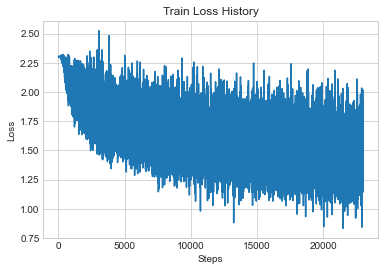

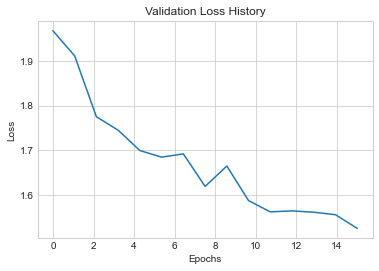

--- 481.6489269733429 Total seconds elapsed ---
SAVING BEST HYPERPARAMS SET BASED ON VALIDATION LOSS 1.526007471821565...
{'learning_rate': 1e-05, 'batch_size': 32, 'num_epochs': 15}
Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 15, learning rate = 1e-05, batch_size=64...
batch 1 / 766: loss 2.302557
batch 101 / 766: loss 2.300203
batch 201 / 766: loss 2.288044
batch 301 / 766: loss 2.289038
batch 401 / 766: loss 2.253110
batch 501 / 766: loss 2.181267
batch 601 / 766: loss 2.098803
batch 701 / 766: loss 2.058975
NEW BEST VALIDATION LOSS ON TRAINING 2.0903507296482005, SAVING MODEL PARAMETERS...
Epoch 1 / 15:
Training Accuracy: 0.173828125
Validation Accuracy: 0.192
Loss: 2.1471298860426047
batch 1 / 766: loss 1.998895
batch 101 / 766: loss 2.084068
batch 201 / 766: loss 2.097423
batch 301 / 766: loss 2.049728
batch 401 / 766: loss 1.997574
batch 501 / 766: loss 1.890829
batch 601 / 766: loss 2.098871
batch 701 / 766: loss 1.8725

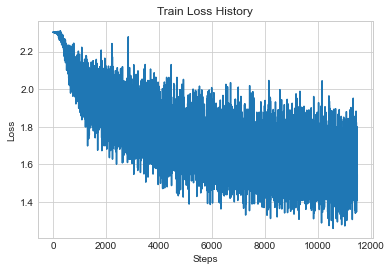

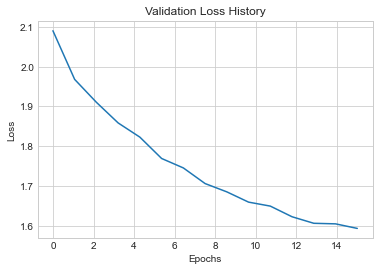

--- 384.64021277427673 Total seconds elapsed ---
Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 15, learning rate = 1e-05, batch_size=128...
batch 1 / 383: loss 2.302155
batch 101 / 383: loss 2.300909
batch 201 / 383: loss 2.291370
batch 301 / 383: loss 2.266377
NEW BEST VALIDATION LOSS ON TRAINING 2.2335727019671077, SAVING MODEL PARAMETERS...
Epoch 1 / 15:
Training Accuracy: 0.125
Validation Accuracy: 0.166
Loss: 2.234743191904299
batch 1 / 383: loss 2.253851
batch 101 / 383: loss 2.167631
batch 201 / 383: loss 2.111060
batch 301 / 383: loss 2.041814
NEW BEST VALIDATION LOSS ON TRAINING 2.07710698754427, SAVING MODEL PARAMETERS...
Epoch 2 / 15:
Training Accuracy: 0.228515625
Validation Accuracy: 0.243
Loss: 2.073755250895044
batch 1 / 383: loss 2.043139
batch 101 / 383: loss 2.036482
batch 201 / 383: loss 2.058643
batch 301 / 383: loss 2.028785
NEW BEST VALIDATION LOSS ON TRAINING 1.994255930644727, SAVING MODEL PARAMETERS...
Ep

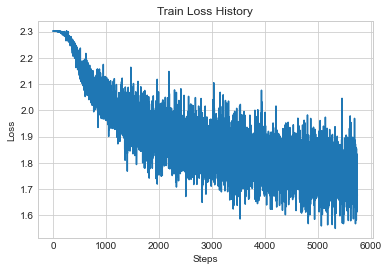

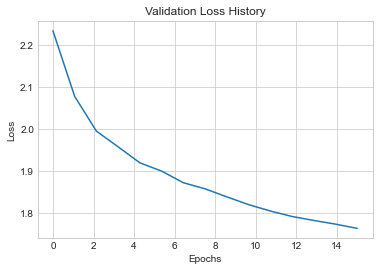

--- 382.3036057949066 Total seconds elapsed ---
Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 15, learning rate = 1e-05, batch_size=256...
batch 1 / 192: loss 2.302341
batch 101 / 192: loss 2.299648
NEW BEST VALIDATION LOSS ON TRAINING 2.2997366591882833, SAVING MODEL PARAMETERS...
Epoch 1 / 15:
Training Accuracy: 0.109375
Validation Accuracy: 0.071
Loss: 2.2914769383868214
batch 1 / 192: loss 2.295103
batch 101 / 192: loss 2.283138
NEW BEST VALIDATION LOSS ON TRAINING 2.253566400624725, SAVING MODEL PARAMETERS...
Epoch 2 / 15:
Training Accuracy: 0.099609375
Validation Accuracy: 0.121
Loss: 2.252736669080774
batch 1 / 192: loss 2.247512
batch 101 / 192: loss 2.178502
NEW BEST VALIDATION LOSS ON TRAINING 2.1474374625443353, SAVING MODEL PARAMETERS...
Epoch 3 / 15:
Training Accuracy: 0.16015625
Validation Accuracy: 0.168
Loss: 2.1842756990589867
batch 1 / 192: loss 2.177756
batch 101 / 192: loss 2.119645
NEW BEST VALIDATION LOSS ON

KeyboardInterrupt: 

In [ ]:
from solution import find_best_model

best_model, best_hyperparams = find_best_model(base_hyperparams=hyperparams,
                                               epoch_nums = [25, ],
                                               batch_sizes = [32, 64, 128, 256, 512],
                                               learning_rates = [1e-5,])

We need to increase epoch_nums, since val_loss never goes up.

Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 25, learning rate = 1e-05, batch_size=32...
batch 1 / 1532: loss 2.302217
batch 101 / 1532: loss 2.302037
batch 201 / 1532: loss 2.283675
batch 301 / 1532: loss 2.295854
batch 401 / 1532: loss 2.269115
batch 501 / 1532: loss 2.144261
batch 601 / 1532: loss 2.085401
batch 701 / 1532: loss 2.029919
batch 801 / 1532: loss 1.994123
batch 901 / 1532: loss 1.847649
batch 1001 / 1532: loss 2.034826
batch 1101 / 1532: loss 2.001632
batch 1201 / 1532: loss 1.938229
batch 1301 / 1532: loss 1.788507
batch 1401 / 1532: loss 1.876374
batch 1501 / 1532: loss 1.971689
NEW BEST VALIDATION LOSS ON TRAINING 2.0174511772113175, SAVING MODEL PARAMETERS...
Epoch 1 / 25:
Training Accuracy: 0.240234375
Validation Accuracy: 0.271
Loss: 2.023396236042723
batch 1 / 1532: loss 2.110646
batch 101 / 1532: loss 1.875305
batch 201 / 1532: loss 1.841881
batch 301 / 1532: loss 1.708196
batch 401 / 1532: loss 1.722516

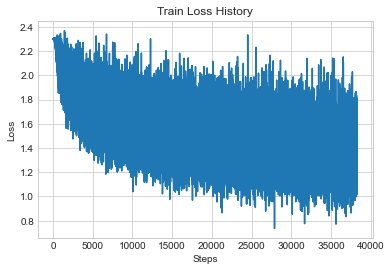

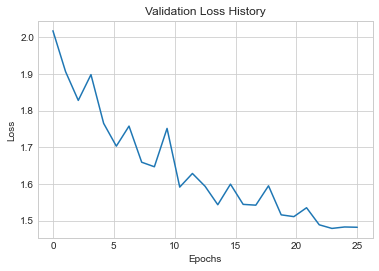

--- 1016.1422529220581 Total seconds elapsed ---
SAVING BEST HYPERPARAMS SET BASED ON VALIDATION LOSS 1.4785676482803611...
{'learning_rate': 1e-05, 'batch_size': 32, 'num_epochs': 25}
Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 25, learning rate = 1e-05, batch_size=64...
batch 1 / 766: loss 2.302776
batch 101 / 766: loss 2.301740
batch 201 / 766: loss 2.287434
batch 301 / 766: loss 2.277045
batch 401 / 766: loss 2.202468
batch 501 / 766: loss 2.164225
batch 601 / 766: loss 2.099028
batch 701 / 766: loss 2.191929
NEW BEST VALIDATION LOSS ON TRAINING 2.105154966737055, SAVING MODEL PARAMETERS...
Epoch 1 / 25:
Training Accuracy: 0.146484375
Validation Accuracy: 0.213
Loss: 2.088810719405909
batch 1 / 766: loss 2.003903
batch 101 / 766: loss 2.044386
batch 201 / 766: loss 2.114131
batch 301 / 766: loss 2.057250
batch 401 / 766: loss 2.034114
batch 501 / 766: loss 2.080165
batch 601 / 766: loss 1.803818
batch 701 / 766: loss 2.0411

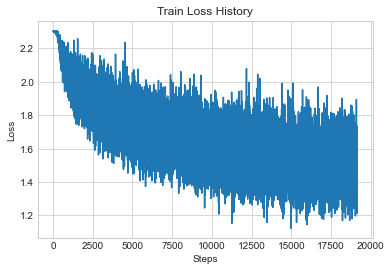

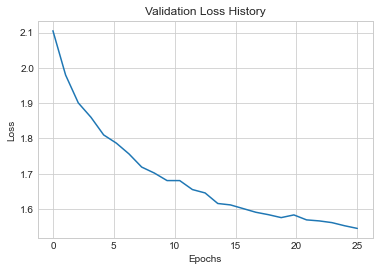

--- 800.1838829517365 Total seconds elapsed ---
Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 25, learning rate = 1e-05, batch_size=128...
batch 1 / 383: loss 2.302871
batch 101 / 383: loss 2.298430
batch 201 / 383: loss 2.290490
batch 301 / 383: loss 2.274842
NEW BEST VALIDATION LOSS ON TRAINING 2.2416652683906637, SAVING MODEL PARAMETERS...
Epoch 1 / 25:
Training Accuracy: 0.125
Validation Accuracy: 0.128
Loss: 2.2373943420178724
batch 1 / 383: loss 2.234753
batch 101 / 383: loss 2.184098
batch 201 / 383: loss 2.098692
batch 301 / 383: loss 2.117600
NEW BEST VALIDATION LOSS ON TRAINING 2.0914545632500086, SAVING MODEL PARAMETERS...
Epoch 2 / 25:
Training Accuracy: 0.189453125
Validation Accuracy: 0.217
Loss: 2.133690964710842
batch 1 / 383: loss 2.098343
batch 101 / 383: loss 1.976995
batch 201 / 383: loss 2.126089
batch 301 / 383: loss 1.895388
NEW BEST VALIDATION LOSS ON TRAINING 2.009534474531486, SAVING MODEL PARAMETERS...


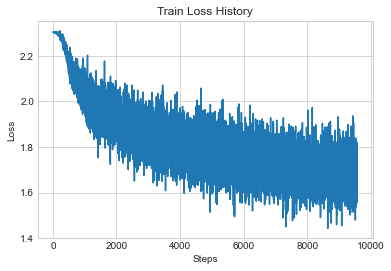

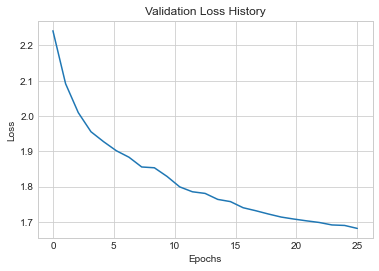

--- 628.2498950958252 Total seconds elapsed ---
Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 25, learning rate = 1e-05, batch_size=256...
batch 1 / 192: loss 2.302600
batch 101 / 192: loss 2.298699
NEW BEST VALIDATION LOSS ON TRAINING 2.2943845866971677, SAVING MODEL PARAMETERS...
Epoch 1 / 25:
Training Accuracy: 0.115234375
Validation Accuracy: 0.092
Loss: 2.285554184420298
batch 1 / 192: loss 2.295907
batch 101 / 192: loss 2.282331
NEW BEST VALIDATION LOSS ON TRAINING 2.248698630731723, SAVING MODEL PARAMETERS...
Epoch 2 / 25:
Training Accuracy: 0.107421875
Validation Accuracy: 0.157
Loss: 2.258069806634651
batch 1 / 192: loss 2.230285
batch 101 / 192: loss 2.196646
NEW BEST VALIDATION LOSS ON TRAINING 2.1561440356069626, SAVING MODEL PARAMETERS...
Epoch 3 / 25:
Training Accuracy: 0.15234375
Validation Accuracy: 0.19
Loss: 2.11981349705274
batch 1 / 192: loss 2.141297
batch 101 / 192: loss 2.130846
NEW BEST VALIDATION LOSS ON 

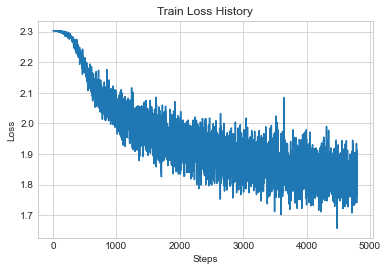

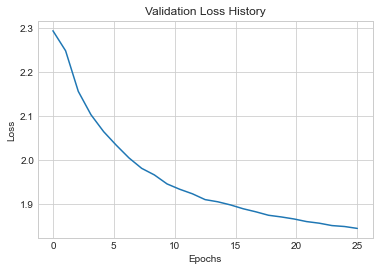

--- 502.3950958251953 Total seconds elapsed ---
Files already downloaded and verified
Files already downloaded and verified
Testing number of epochs = 25, learning rate = 1e-05, batch_size=512...
batch 1 / 96: loss 2.302396
NEW BEST VALIDATION LOSS ON TRAINING 2.300005422168386, SAVING MODEL PARAMETERS...
Epoch 1 / 25:
Training Accuracy: 0.13671875
Validation Accuracy: 0.095
Loss: 2.298863458744968
batch 1 / 96: loss 2.299117
NEW BEST VALIDATION LOSS ON TRAINING 2.293614045770937, SAVING MODEL PARAMETERS...
Epoch 2 / 25:
Training Accuracy: 0.1015625
Validation Accuracy: 0.095
Loss: 2.2934320609115875
batch 1 / 96: loss 2.295105
NEW BEST VALIDATION LOSS ON TRAINING 2.2782667970846107, SAVING MODEL PARAMETERS...
Epoch 3 / 25:
Training Accuracy: 0.1015625
Validation Accuracy: 0.102
Loss: 2.274084127787891
batch 1 / 96: loss 2.278140
NEW BEST VALIDATION LOSS ON TRAINING 2.2470385648878497, SAVING MODEL PARAMETERS...
Epoch 4 / 25:
Training Accuracy: 0.107421875
Validation Accuracy: 0.157
Lo

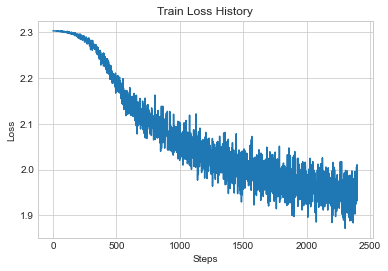

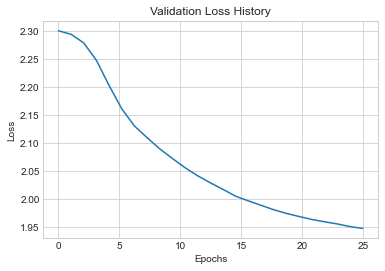

--- 476.30661606788635 Total seconds elapsed ---


In [ ]:
from solution import find_best_model

best_model, best_hyperparams = find_best_model(base_hyperparams=hyperparams,
                                               epoch_nums = [25, ],
                                               batch_sizes = [32, 64, 128, 256, 512],
                                               learning_rates = [1e-5,])

It looks like, that we can increase number of epochs even more, but let's stop with the current best parameters.

In [ ]:
print('Best hyperparameters: ', best_hyperparams)

Best hyperparameters:  {'num_epochs': 25, 'learning_rate': 1e-05, 'reg': 0.1, 'learning_rate_decay': 0.95, 'batch_size': 32, 'input_size': 3072, 'hidden_size': 128, 'output_size': 10}


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Testing number of epochs = 25, learning rate = 1e-05, batch_size=32...
batch 1 / 1532: loss 2.302803
batch 101 / 1532: loss 2.302059
batch 201 / 1532: loss 2.285670
batch 301 / 1532: loss 2.298460
batch 401 / 1532: loss 2.251904
batch 501 / 1532: loss 2.107673
batch 601 / 1532: loss 2.132907
batch 701 / 1532: loss 2.085040
batch 801 / 1532: loss 2.107051
batch 901 / 1532: loss 2.125039
batch 1001 / 1532: loss 2.076172
batch 1101 / 1532: loss 2.018401
batch 1201 / 1532: loss 2.112268
batch 1301 / 1532: loss 2.090267
batch 1401 / 1532: loss 2.003073
batch 1501 / 1532: loss 1.928547
NEW BEST VALIDATION LOSS ON TRAINING 1.948242255899446, SAVING MODEL PARAMETERS...
Epoch 1 / 25:
Training Accuracy: 0.193359375
Validation Accuracy: 0.287
Loss: 1.4547094977081276
batch 1 / 1532: loss 2.034399
batch 101 / 1532: loss 1.974598
batch 201 / 1532: loss 1.916768
batch 301 / 1532: loss 1.903242
batch 401 / 1532: 

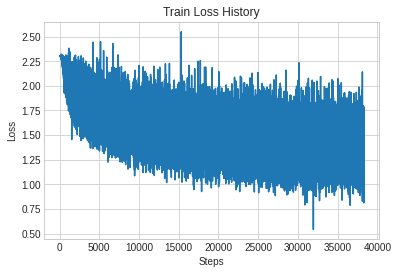

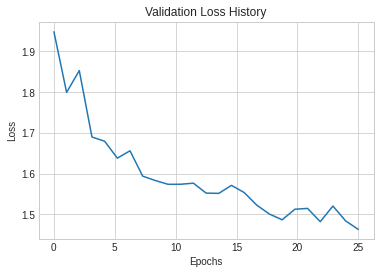

--- 636.8702850341797 Total seconds elapsed ---
SAVING BEST HYPERPARAMS SET BASED ON VALIDATION LOSS 1.463308071487626...
{'learning_rate': 1e-05, 'batch_size': 32, 'num_epochs': 25}


In [10]:
# just to retrain best_model in a faster manner to evaluate accuracy and loss
from solution import find_best_model

best_hyperparams = {
    'num_epochs': 25, 
    'learning_rate': 1e-05,
    'reg': 0.1, 
    'learning_rate_decay': 0.95, 
    'batch_size': 32, 
    'input_size': 3072, 
    'hidden_size': 128, 
    'output_size': 10,
}

best_model, _ = find_best_model(base_hyperparams=best_hyperparams)

In [15]:
test_loss, _ = best_model.loss(X_test, y_test, reg=0)
test_accuracy = (best_model.predict(X_test) == y_test.numpy()).mean()
print('Best model has test loss={} and accuracy={}.'.format(test_loss, test_accuracy))

Best model has test loss=1.440165522308209 and accuracy=0.4925.


## 4 Data Augmentation in Natural Language Processing (NLP) (2.5 pts)

You have learned about data augmentation as a regularization technique to reduce overfitting. For image data, you can do various transformations. For natural language processing problems, this is not as straight-forward.

Read about [Data Augmentation in NLP by Shahul E.S.](https://neptune.ai/blog/data-augmentation-nlp). For a fuller picture, you can also have a look at [the Visual Survey of Data Augmentation in NLP by Amit Chaudhary](https://amitness.com/2020/05/data-augmentation-for-nlp/). 

After consulting the above resources, answer the following questions:


1. In computer vision, data augmentation happens on the go, whereas in NLP data is augmented before training. Why is it so? Explain in 3-4 sentences. (0.5 pts)

2. Data augmentation in NLP is very task-specific and should be applied carefully. Provide an example of a augmentation method  and task pair where data augmentation might harm the model. Justify your answer (2-4 sentences). A (non-exhaustive) list of NLP tasks you can be found at the [Natural Language Understanding Wiki](https://natural-language-understanding.fandom.com/wiki/List_of_natural_language_processing_tasks). You can also give an example with a task not from this list. (1 pt)

3. If we perform K-fold cross-validation, do we augment data before or after splitting the data? Why? Give at least *two* reasons. (0.5 pts)

4. Does the proportion of augmented data depend on the size of the training dataset? Explain why. Hint: think about the relation between training dataset size and overfitting. (0.5 pts)



## 4 <font color="green">Answer</font>



1. In computer vision different trivial methods or operations of transforming an image does not vary the semantics of the image significantly. These transformations can occur randomly on the go as the structure of the image will be intact. In NLP, depending on what the model or task there is a more appropriate method or operation to apply. Therefore, it is difficult to implement augmentation during training as applying a random augmentation technique to any NLP model.


2. A augmentation method and task pair where data augmentation might harm the model is random deletion and word sense disambiguation. This is because word sense disambiguation usually has features (except for topical features) that represent with the context of a word or words. Random deletion may harm the model by having less data for extracting information about such contexts. 

3. Augment the data after splitting the data because it is important to keep the original sample and augmented sample in the same fold to prevent overfitting and also do not want part of the augmented data to be used for validation. 


4. Yes to an extent, this is because the more augmented data there is to add to the small dataset the more chances the model can learn to generalize. However, it should be done carefully and sparingly as the model could instead learn the "noise" of the augmented data and overfit to it as well.  